In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Exploring the dataset

The data folder contains 3 sets of training and test datasets. Politicians dataset describes various attributes of a politician and the task is to predict whether the politician belongs to democrat or republican party. Another dataset provides data regarding students grades (A or not A) in various courses and goal is to predict the final grade (A or not A). Finally, there is a toy dataset for sanity check of the implementation 

In [2]:
# train = pd.read_csv("data/small_train.csv")
# test = pd.read_csv("data/small_test.csv")
train = pd.read_csv("data/politicians_train.csv")
test = pd.read_csv("data/politicians_test.csv")

# train = pd.read_csv("data/education_train.csv")
# test = pd.read_csv("data/education_test.csv")
train.head()

,Anti_satellite_test_ban,Aid_to_nicaraguan_contras,Mx_missile,Immigration,Superfund_right_to_sue,Duty_free_exports,Export_south_africa,Party
0,n,n,n,y,y,y,y,democrat
1,n,n,n,y,y,n,y,republican
2,y,y,y,n,n,y,y,democrat
3,y,y,n,n,n,y,y,democrat
4,y,y,n,n,n,y,y,democrat


In [3]:
train.describe()

,Anti_satellite_test_ban,Aid_to_nicaraguan_contras,Mx_missile,Immigration,Superfund_right_to_sue,Duty_free_exports,Export_south_africa,Party
count,149,149,149,149,149,149,149,149
unique,2,2,2,2,2,2,2,2
top,y,n,n,n,y,n,y,democrat
freq,81,86,96,82,92,90,126,83


Dataset contains categorical data with 2 categories for each feature. These features need to be encoded for which ordinal encoder from scikit-learn can be used

In [4]:
encoder = OrdinalEncoder()
encoded_train = encoder.fit_transform(train)
encoded_test = encoder.transform(test)
encoded_train[:5,:]
encoded_train.shape, encoded_test.shape

((149, 8), (83, 8))

The dataset can be separated into features and labels for training the decision tree using sklearn decision tree classifier

In [5]:
x_train, y_train = encoded_train[:,:-1], encoded_train[:,-1]
x_test, y_test = encoded_test[:,:-1], encoded_test[:,-1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149, 7), (149,), (83, 7), (83,))

Decision tree classifier from sklearn can be imported with criterion of entropy (information gain) since the from scratch implementation uses information gain.

In [6]:
model = DecisionTreeClassifier(criterion="entropy")
mod = model.fit(x_train, y_train)

In [7]:
predictions = mod.predict(x_train)
print(f"The accuracy of the model on training dataset is {accuracy_score(y_train, predictions)}")

The accuracy of the model on training dataset is 0.9328859060402684


In [8]:
predictions = mod.predict(x_test)
print(f"The accuracy of the model on test dataset is {accuracy_score(y_test, predictions)}")

The accuracy of the model on test dataset is 0.7951807228915663


The trained model of the decision tree can be visualized using graphviz. In order to get a better idea of the plot, refer to the png file saved in the repository

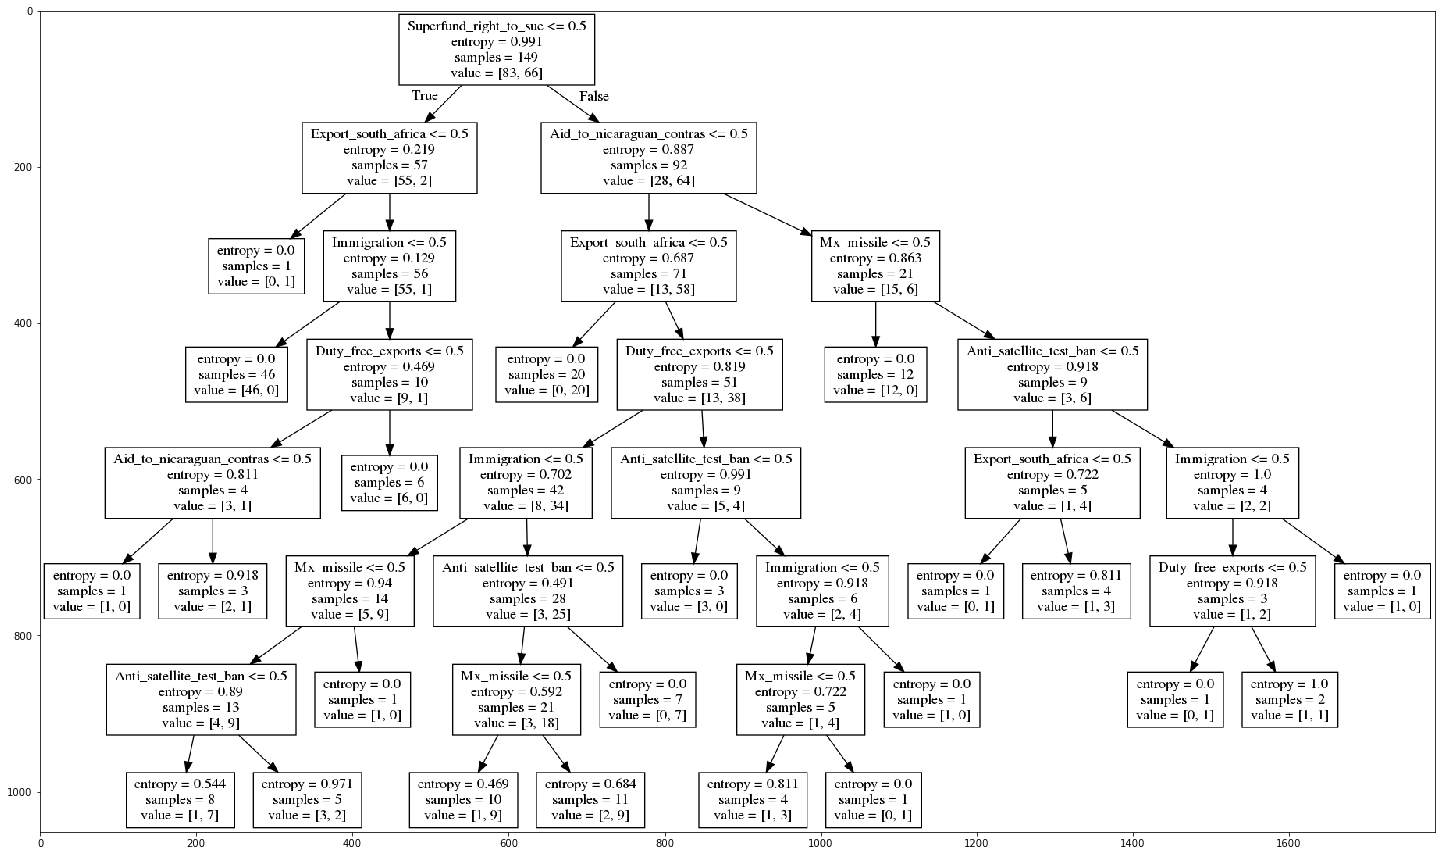

In [9]:
from sklearn import tree
import matplotlib.image as mpimg
tree.export_graphviz(mod,out_file='tree.dot',feature_names=train.columns[:-1])
!dot -Tpng tree.dot -o tree.png 

plt.figure(figsize=[25,25])
img=mpimg.imread('tree.png')
imgplot = plt.imshow(img)
plt.show()

# Parameters involved in Decision Tree

Some of the parameters involved in decision trees are as follows:
-  split criterion: Gini impurity (default) can be used in place of information gain
-  max_depth: Decision Trees can be regularized by specifying a maximum depth for the model
-  min_samples_split: While determining a split, at least 2 values are required. This can be increased to get an effect of regularization for the model
-  min_samples_leaf: Another way to regularize model can be to restrict depth of trees by specifying minimum number of samples at each leaf
-  max_features: For better generalization, the number of features available while finding the best split can be restricted

In [10]:
# Let's define a function to compute results given the model to observe impact of these parameters
def decision_tree_results(model):
    mod = model.fit(x_train, y_train)
    predictions = mod.predict(x_train)
    print(f"The accuracy of the model on training dataset is {accuracy_score(y_train, predictions)}")
    predictions = mod.predict(x_test)
    print(f"The accuracy of the model on test dataset is {accuracy_score(y_test, predictions)}")

print("Model using information gain as split criteria and default parameters")
model = DecisionTreeClassifier(criterion="entropy")
decision_tree_results(model)

print("\nModel using gini impurity as split criteria and default parameters")
model = DecisionTreeClassifier(criterion="gini")
decision_tree_results(model)

print("\nModel using gini impurity as split criteria and max depth of 4")
model = DecisionTreeClassifier(criterion="gini",max_depth=4)
decision_tree_results(model)

print("\nModel using gini impurity as split criteria and min samples split as 9")
model = DecisionTreeClassifier(criterion="gini",min_samples_split=9)
decision_tree_results(model)

print("\nModel using gini impurity as split criteria, max depth of 4 and max features of 0.9")
model = DecisionTreeClassifier(criterion="gini", min_samples_leaf=4)# ,max_features=0.9)
decision_tree_results(model)

Model using information gain as split criteria and default parameters
The accuracy of the model on training dataset is 0.9328859060402684
The accuracy of the model on test dataset is 0.7951807228915663

Model using gini impurity as split criteria and default parameters
The accuracy of the model on training dataset is 0.9328859060402684
The accuracy of the model on test dataset is 0.8072289156626506

Model using gini impurity as split criteria and max depth of 4
The accuracy of the model on training dataset is 0.9060402684563759
The accuracy of the model on test dataset is 0.8313253012048193

Model using gini impurity as split criteria and min samples split as 9
The accuracy of the model on training dataset is 0.9194630872483222
The accuracy of the model on test dataset is 0.8192771084337349

Model using gini impurity as split criteria, max depth of 4 and max features of 0.9
The accuracy of the model on training dataset is 0.8993288590604027
The accuracy of the model on test dataset is 

# Validating from scratch implementation

The implemetation is in the form of python scripts and can be run independently. It has been included here so that performance can be validated against the sklearn implementation

In [11]:
from decision_tree import *
train_dir = "data/politicians_train.csv"
test_dir = "data/politicians_test.csv"
max_d = None

train_x, train_y, vocab, header = read_data(train_dir)
test_x, test_y = read_data(test_dir, vocab, test_mode = True)

header = header[:-1]

DT_obj = DT(max_d)
DT_obj.train(train_x, train_y, header)

train_predictions = DT_obj.predict(train_x, header)

print(f"Training dataset accuracy is {accuracy(train_y,train_predictions)}")

predictions = DT_obj.predict(test_x, header)

print(f"Test dataset accuracy is {accuracy(test_y,predictions)}")

Superfund_right_to_sue {0: {0: 28, 1: 64}, 1: {0: 55, 1: 2}}   head_node None
|Aid_to_nicaraguan_contras {0: {0: 13, 1: 58}, 1: {1: 6, 0: 15}}  when  Superfund_right_to_sue  is  0
|Export_south_africa {0: {0: 55, 1: 1}, 1: {1: 1}}  when  Superfund_right_to_sue  is  1
||Export_south_africa {0: {0: 13, 1: 38}, 1: {1: 20}}  when  Aid_to_nicaraguan_contras  is  0
||Mx_missile {1: {1: 6, 0: 3}, 0: {0: 12}}  when  Aid_to_nicaraguan_contras  is  1
||Immigration {1: {0: 46}, 0: {0: 9, 1: 1}}  when  Export_south_africa  is  0
|||Duty_free_exports {0: {0: 5, 1: 4}, 1: {1: 34, 0: 8}}  when  Export_south_africa  is  0
|||Anti_satellite_test_ban {0: {1: 4, 0: 1}, 1: {1: 2, 0: 2}}  when  Mx_missile  is  1
|||Duty_free_exports {0: {0: 6}, 1: {0: 3, 1: 1}}  when  Immigration  is  0
||||Anti_satellite_test_ban {0: {0: 3}, 1: {0: 2, 1: 4}}  when  Duty_free_exports  is  0
||||Immigration {0: {1: 25, 0: 3}, 1: {0: 5, 1: 9}}  when  Duty_free_exports  is  1
||||Export_south_africa {1: {1: 1}, 0: {1: 3, 0: 1